<a href="https://colab.research.google.com/github/thaleson/datascience/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados do Catalogo Netflix**

*por [Thaleson silva ](https://www.linkedin.com/in/thaleson-silva-9298a0296/)*

---
**Data  Science**
---

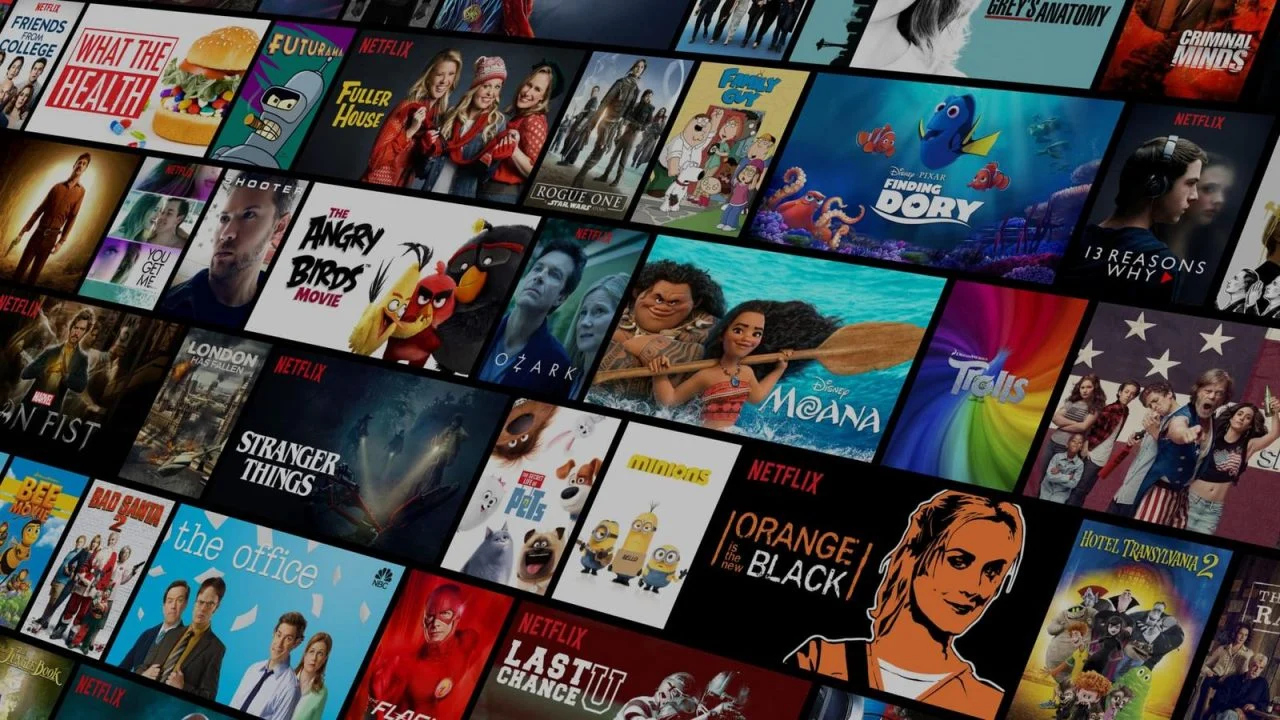

**Introdução:**

🍿📊 Bem-vindos a uma viagem emocionante pelos bastidores do entretenimento digital! Nesta análise de dados, mergulharemos fundo no vasto oceano de conteúdo oferecido pela gigante do streaming, a Netflix. Preparem-se para uma jornada repleta de descobertas fascinantes, insights surpreendentes e, é claro, uma pitada de diversão! 🎉

Com o advento da era digital, a forma como consumimos mídia e entretenimento passou por uma transformação radical. A Netflix, com sua vasta biblioteca de filmes, séries de TV e produções originais, emergiu como uma força dominante neste novo cenário, moldando os hábitos de milhões de espectadores ao redor do globo.

Nesta análise, exploraremos os meandros do catálogo da Netflix, desvendando segredos sobre os gostos e preferências dos espectadores, identificando tendências emergentes e extraindo insights valiosos que podem orientar as estratégias da empresa e informar decisões futuras.

Da comédia ao drama, da ação ao romance, navegaremos por um vasto mar de dados, analisando desde a ascensão dos diretores mais prolíficos até a identificação da duração máxima de um filme/série. Ao longo do caminho, seremos guiados pela luz da curiosidade e pelo poder dos números, desvendando os mistérios do universo da Netflix.

Então, preparem suas pipocas, ajustem suas configurações de resolução e embarquem nesta jornada emocionante pelo fascinante mundo do streaming digital. A Netflix está prestes a revelar seus segredos, e nós estaremos aqui para decifrá-los juntos!

Vamos lá! 🚀🎬

---


# **Obtenção dos Dados**

In [56]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [57]:

# importar o arquivo netflix.csv para um DataFrame
df=pd.read_csv("netflix.csv")

In [58]:
# mostrar as 5 primeiras entradas
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...




# **Dicionário das variáveis**

| Coluna       | Descrição                                                |
|--------------|----------------------------------------------------------|
| Show_Id      | Identificador único de cada show na Netflix.            |
| Category     | Categoria do show (por exemplo, filme, série de TV, etc.)|
| Title        | Título do show.                                          |
| Director     | Diretor do show (se aplicável).                          |
| Cast         | Elenco do show.                                          |
| Country      | País de origem do show.                                  |
| Release_Date | Data de lançamento do show na Netflix.                   |
| Rating       | Classificação etária do show.                            |
| Duration     | Duração do show (por exemplo, número de temporadas para uma série de TV ou duração de um filme). |
| Type         | Tipo do show (por exemplo, se é um filme ou uma série de TV). |
| Description  | Descrição ou sinopse do show.                           |


# **Análise dos Dados**

**Qual a porcentagem de valores ausentes no dataset?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas

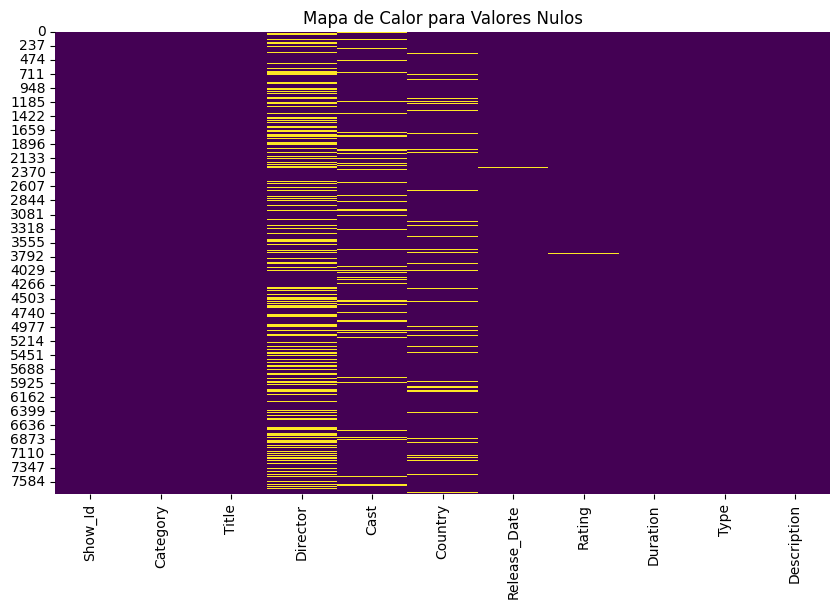

In [59]:
# Verificar valores nulos com mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de Calor para Valores Nulos')
plt.show()


In [60]:
# 1. Verificar Duplicatas:
duplicatas = df.duplicated().sum()
if duplicatas > 0:
    df = df.drop_duplicates()
    print("Registros duplicados foram removidos.")
else:
    print("Não há registros duplicados.")




Registros duplicados foram removidos.



1. **Para 'House of Cards': Qual é o ID do show e quem é o diretor deste programa?**

In [61]:
# Encontrar informações para 'House of Cards'
house_of_cards_info = df[df['Title'] == 'House of Cards'][['Show_Id', 'Director']]

# Imprimir a resposta de forma mais formal
print("1. Para 'House of Cards':")
print("   - ID do show:", house_of_cards_info['Show_Id'].values[0])
print("   - Diretor:", house_of_cards_info['Director'].values[0])


1. Para 'House of Cards':
   - ID do show: s2833
   - Diretor: Robin Wright, David Fincher, Gerald McRaney, John David Coles, David Manson


 2. **Em que ano o maior número de filmes e séries foram lançados?**

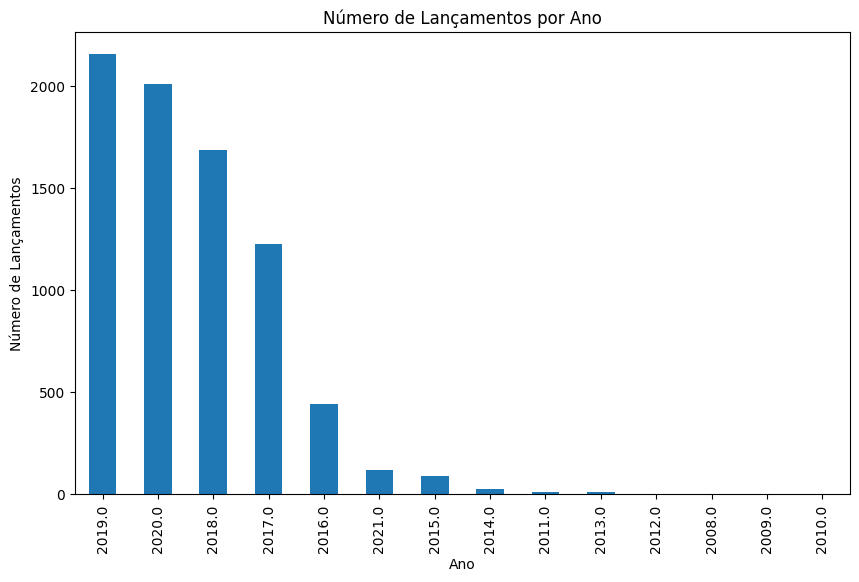

In [ ]:
plt.figure(figsize=(10, 6))
df['Year'] = pd.to_datetime(df['Release_Date']).dt.year
df['Year'].value_counts().plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Número de Lançamentos')
plt.title('Número de Lançamentos por Ano')
plt.show()


 3. **Quantos filmes e séries estão no conjunto de dados?**

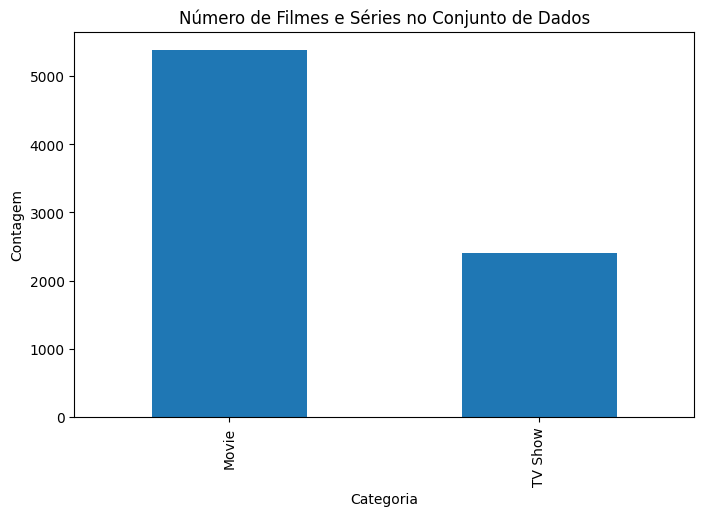

In [ ]:
plt.figure(figsize=(8, 5))
df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.title('Número de Filmes e Séries no Conjunto de Dados')
plt.show()


 4. **Mostre todos os filmes lançados em 2000.**

In [36]:
# Filtrar os filmes lançados em 2000
filmes_2000 = df[(df['Category'] == 'Movie') & (df['Release_Date'].str.contains('2000'))]

# Contar o número de filmes lançados em 2000
numero_filmes_2000 = filmes_2000.shape[0]

# Imprimir a resposta
print("Todos os filmes lançados em 2000 foram:", numero_filmes_2000)


Todos os filmes lançados em 2000 foram: 0


5. **Mostre apenas os títulos de todas as séries de TV lançadas apenas na Índia.**

In [39]:
# Filtrar as séries de TV lançadas apenas na Índia
series_india = df[(df['Category'] == 'TV Show') & (df['Country'] == 'India')]

# Criar uma lista com os títulos das séries de TV
titulos_series_india = series_india['Title'].tolist()

# Construir a lista em formato Markdown com o título no início
lista_markdown = f"Títulos de todas as séries de TV lançadas apenas na Índia:\n\n" + "\n".join([f"- {titulo}" for titulo in titulos_series_india])

# Imprimir a lista formatada em Markdown
print(lista_markdown)


Títulos de todas as séries de TV lançadas apenas na Índia:

- 21 Sarfarosh: Saragarhi 1897
- 7 (Seven)
- Agent Raghav
- Akbar Birbal
- Anjaan: Rural Myths
- Anjaan: Special Crimes Unit
- Bad Boy Billionaires: India
- Badalte Rishton Ki Dastaan
- Bard of Blood
- Betaal
- Bh Se Bhade
- Bhaag Beanie Bhaag
- Bhaage Re Mann
- Chhota Bheem
- ChuChu TV Nursery Rhymes & Kids Songs (Hindi)
- Classic Legends
- College Romance
- Cricket Fever: Mumbai Indians
- Darr Sabko Lagta Hai
- Delhi Crime
- Devlok with Devdutt Pattanaik
- Dharmakshetra
- Engineering Girls
- Fabulous Lives of Bollywood Wives
- Fear Files... Har Mod Pe Darr
- Gabru: Hip Hop Revolution
- Gangs of Hassepur
- GHOUL
- Girls Hostel
- Hasmukh
- Inmates
- Jamtara - Sabka Number Ayega
- Jhansi Ki Rani
- Khan: No. 1 Crime Hunter
- Khelti Hai Zindagi Aankh Micholi
- Khotey Sikkey
- Ladies Up
- Leila
- Little Singham
- Little Things
- Maharakshak Devi
- Maharakshak: Aryan
- Mahi Way
- Masaba Masaba
- Midnight Misadventures With Mallika 

 6. **Mostre os 10 principais diretores, que deram o maior número de filmes e séries para a Netflix.**

In [41]:
top_diretores = df['Director'].value_counts().head(10)
print("Os 10 principais diretores:")
print()
print(top_diretores)
print()

Os 10 principais diretores:

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Robert Rodriguez           8
Name: Director, dtype: int64



7. **Mostre todos os registros, onde "Categoria é Filme e Tipo é Comédias" ou "País é Reino Unido".**

In [45]:
# Filtrar os registros onde Categoria é Filme e Tipo é Comédias ou País é Reino Unido
filtro_filmes_comedias_uk = df[(df['Category'] == 'Movie') & (df['Type'].str.contains('Comedies', na=False)) | (df['Country'] == 'United Kingdom')]

# Selecionar as colunas para a impressão
colunas_selecionadas = ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

# Imprimir a tabela formatada em Markdown
print("7. Registros onde Categoria é Filme e Tipo é Comédias ou País é Reino Unido:\n")
print(filtro_filmes_comedias_uk[colunas_selecionadas].to_markdown(index=False))


7. Registros onde Categoria é Filme e Tipo é Comédias ou País é Reino Unido:

| Show_Id   | Category   | Title                                                                     | Director                                                                                                                                                                                                         | Cast                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

 8. **Em quantos filmes/séries Tom Cruise atuou?**

In [ ]:
tom_cruise_count = df['Cast'].str.contains('Tom Cruise').sum()
print("8. Número de filmes/séries em que Tom Cruise atuou:", tom_cruise_count)
print()

8. Número de filmes/séries em que Tom Cruise atuou: 2



 9. **Quais são as diferentes classificações definidas pela Netflix?**

In [47]:
classificacoes_diferentes = df['Rating'].unique()
print("9. Diferentes classificações definidas pela Netflix:")
print()
print(classificacoes_diferentes)
print()

9. Diferentes classificações definidas pela Netflix:

['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' nan 'TV-Y7' 'PG'
 'G' 'NC-17' 'TV-Y7-FV' 'UR']



In [ ]:
# Quantos filmes receberam a classificação 'TV-14' no Canadá?
tv_14_canada_count = df[(df['Rating'] == 'TV-14') & (df['Country'] == 'Canada')]['Category'].value_counts()
print("Número de filmes com classificação 'TV-14' no Canadá:", tv_14_canada_count['Movie'])

Número de filmes com classificação 'TV-14' no Canadá: 11


In [ ]:

# Quantos filmes receberam a classificação 'TV-14' no Canadá?
tv_14_canada_count = df[(df['Rating'] == 'TV-14') & (df['Country'] == 'Canada')]['Category'].value_counts()
print("Número de filmes com classificação 'TV-14' no Canadá:", tv_14_canada_count['Movie'])



Número de filmes com classificação 'TV-14' no Canadá: 11


In [ ]:
# Quantas séries de TV receberam a classificação 'R', após o ano de 2018?
tv_r_count_after_2018 = df[(df['Rating'] == 'R') & (df['Category'] == 'TV Show') & (df['Year'] > 2018)].shape[0]
print("Número de séries de TV com classificação 'R', após o ano de 2018:", tv_r_count_after_2018)
print()

Número de séries de TV com classificação 'R', após o ano de 2018: 1



 10. **Qual é a duração máxima de um filme/série na Netflix?**

In [ ]:
# Primeiro, precisamos extrair a parte numérica da coluna 'Duration' para obter a duração em minutos.
# Isso nos permitirá calcular a duração máxima de um filme/série na Netflix.

# Vamos extrair a parte numérica da coluna 'Duration' usando expressões regulares.
durations = df['Duration'].str.extract('(\d+)')
# Em seguida, precisamos converter esses valores extraídos para números float para realizar cálculos.
durations_in_minutes = durations.astype(float)
# Agora, vamos encontrar o valor máximo de duração em minutos.
max_duration = durations_in_minutes.max()

# Agora que temos a duração máxima, vamos imprimi-la.
print("A duração máxima de um filme/série na Netflix é de aproximadamente", max_duration.values[0], "minutos.")




A duração máxima de um filme/série na Netflix é de aproximadamente 312.0 minutos.


 11. **Qual país individual tem o maior número de séries de TV?**

In [ ]:
pais_maior_numero_series = df[df['Category'] == 'TV Show']['Country'].value_counts().idxmax()
print("11. País com o maior número de séries de TV:", pais_maior_numero_series)
print()

11. País com o maior número de séries de TV: United States



 12. **Como podemos ordenar o conjunto de dados por ano**?

In [64]:
# Extrair o ano da coluna 'Release_Date'
df['Year'] = pd.to_datetime(df['Release_Date']).dt.year

# Ordenar o conjunto de dados por ano
df_ordenado_por_ano = df.sort_values(by='Year')

# Imprimir os primeiros registros do DataFrame ordenado por ano
print("12. Conjunto de dados ordenado por ano:\n")
print(df_ordenado_por_ano[['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description', 'Year']].head().to_markdown(index=False))


12. Conjunto de dados ordenado por ano:

| Show_Id   | Category   | Title                       | Director             | Cast                                                                                                                                                                                               | Country       | Release_Date      | Rating   | Duration   | Type                                  | Description                                                                                                                                         |   Year |
|:----------|:-----------|:----------------------------|:---------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------------|:------------------|:---------|:-----------|:--------------------------------------|:----------------------------------------------

13. **Encontre todas as instâncias onde: A categoria é 'Filme' e o tipo é 'Dramas' ou a categoria é 'Série de TV' e o tipo é 'TV Infantil'.**

In [66]:
# Filtrar as instâncias
instancias = df[((df['Category'] == 'Movie') & (df['Type'] == 'Dramas')) | ((df['Category'] == 'TV Show') & (df['Type'] == 'Kids TV'))]

# Imprimir o resultado
print("Instâncias onde a categoria é 'Filme' e o tipo é 'Dramas' ou a categoria é 'Série de TV' e o tipo é 'TV Infantil':\n")
print(instancias.to_markdown(index=False))


Instâncias onde a categoria é 'Filme' e o tipo é 'Dramas' ou a categoria é 'Série de TV' e o tipo é 'TV Infantil':

| Show_Id   | Category   | Title                           | Director                       | Cast                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            | Country                                                    | Release_Date       | Rating   | Duration   | Type   | Description                                                                                                                                                                      


---

**Conclusão:**

🎬💻 Ao final desta emocionante jornada pela análise dos dados do catálogo da Netflix, navegamos por um vasto oceano de entretenimento digital, mergulhando fundo nas profundezas dos bytes e dos pixels. 💻🎬

🔍 Durante nossa expedição, desvendamos segredos intrigantes sobre os hábitos de consumo dos espectadores e as peculiaridades do vasto reino do streaming. Descobrimos que a Netflix não é apenas um lugar para maratonar nossas séries favoritas, mas também um território de descoberta e diversidade, onde o leque de opções é tão vasto quanto o universo cinematográfico. 🌟

💡 Nossa análise revelou uma miríade de insights valiosos, desde a ascendência dos 10 diretores mais prolíficos até a estranha ausência de filmes do ano 2000. Descobrimos também que a duração máxima de um filme/série na Netflix é de 312 minutos - tempo suficiente para uma sessão de cinema épica ou algumas rodadas de pipoca quente! 🍿

📊 Além disso, exploramos o território desconhecido das classificações de conteúdo, mapeando as fronteiras entre TV-MA e TV-Y, entre risos e lágrimas, entre suspense e romance. E ao fazê-lo, abrimos as portas para uma compreensão mais profunda das preferências dos espectadores e das tendências do mercado. 🌎

🚀 Como aventureiros ousados em um mundo de dados, provamos que a análise de dados não é apenas uma ferramenta poderosa, mas também uma jornada emocionante repleta de descobertas surpreendentes e momentos divertidos. E à medida que navegamos pelos mares digitais do entretenimento, continuaremos a buscar novos horizontes e desafios, sempre com um olho no telescópio e outro na tela. 🚀

Então, meus amigos cinéfilos, que nossa jornada pela análise de dados da Netflix seja apenas o começo de muitas aventuras emocionantes no vasto e infinito universo do entretenimento digital! 🌟🎉

Até a próxima, e que a força dos dados esteja sempre com vocês! 💪📊

